In [1]:
import pandas as pd 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np 
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns 
from xgboost import XGBRegressor
from sklearn.svm import SVR

In [2]:
def model_perform(X_train,y_train, X_test, y_test, model, name, verbose = 0 ):
    # train 
    model.fit(X_train, y_train)

    # test 
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)


    if verbose == 1 :
        print(' MAE {} '.format(mean_absolute_error(y_pred_test,y_test)))
        print(' MSE {} '.format(mean_squared_error(y_pred_test,y_test)))
        print(' R2 {} '.format(r2_score(y_train,y_pred_train)))
    else : 
        pass 
    
    result = {}
    result['mae'] = np.round(mean_absolute_error(y_pred_test,y_test),5)
    result['mse'] = np.round(mean_squared_error(y_pred_test,y_test),5)
    result['R2'] = np.round(r2_score(y_train,y_pred_train),5)
    result['name'] = name
    result['feature_size'] = X_train.shape[1]
    result['train_size'] = X_train.shape[0]
    result['test_size'] = X_test.shape[0]

    return model, y_pred_test, y_pred_train, result 

def show_error_pattern(y_pred, y_test):
    result_test = pd.DataFrame()
    result_test['score'] = y_pred
    result_test['type'] = 'predict'
    result_test['idx'] = np.arange(result_test.shape[0])

    result_test2 = pd.DataFrame()
    result_test2['score'] = np.squeeze(y_test)
    result_test2['type'] = 'test'
    result_test2['idx'] = np.arange(result_test2.shape[0])

    df_result = pd.concat([result_test2,result_test])

    sns.lineplot(data=df_result, x="idx", y='score', hue="type")


def bulk_train(df_input, drop_column, target_column, dataset_name, verbose = 0):

    error_report = []
    model_dict = {}

    # scaled the values 
    features_columns = df_input.drop(drop_column,axis=1).columns
    features_columns = list(features_columns) + [target_column]
    scaler = MinMaxScaler()
    df_input_scale = pd.DataFrame(scaler.fit_transform(df_input[features_columns]), columns = features_columns)
    

    # split train and test 
    X_train, X_test, y_train, y_test = train_test_split(df_input_scale.drop(target_column, axis=1), df_input_scale[target_column], test_size=0.12, random_state=42)

    regr = RandomForestRegressor(random_state=0)
    model_regr, y_pred_test_regr, y_pred_train_regr, result_rf   = model_perform(X_train, y_train, X_test, y_test, regr, name='rf', verbose = verbose )
    error_report.append(result_rf)

    xgbr = XGBRegressor(random_state=0)
    model_xgbr, y_pred_test_xgbr, y_pred_train_xgbr, result_xgb  = model_perform(X_train, y_train, X_test, y_test, xgbr, name='xgb', verbose = verbose)
    error_report.append(result_xgb)

    # SVR 
    svr = SVR(kernel='poly')
    model_svr, y_pred_test_svr, y_pred_train_svr, result_svr  = model_perform(X_train, y_train, X_test, y_test, svr, name='svr',verbose = verbose)
    error_report.append(result_svr)

    model_dict['rf'] = model_regr
    model_dict['xgbr'] = result_xgb
    model_dict['svr'] = result_svr
    
    df_report = pd.DataFrame(error_report)
    df_report['dataset'] = dataset_name
    return  model_dict, df_report

# Bulk Training 

In [3]:
# zomato only
df_zom = pd.read_csv('data/3_clean_zomato_feat.csv')
df_zom['rest_price_idr'] = df_zom['rest_price_idr'] / 1000
df_zom['rest_price_idr'] = df_zom['rest_price_idr'].astype(int)

drop_column = ['url','index','rating','lat','long','review','new_code_res_type','new_code_fac']

target_column = 'rating'
model_zom, report_zom = bulk_train(df_input=df_zom, drop_column=drop_column, target_column=target_column, dataset_name='zomato_only')

In [4]:
# zomato geo 250
df_zom_poi = pd.read_csv('data/3_clean_zomato_gof_250.csv')
df_zom_poi['rest_price_idr'] = df_zom_poi['rest_price_idr'] / 1000
df_zom_poi['rest_price_idr'] = df_zom_poi['rest_price_idr'].astype(int)

drop_column = ['url','index','rating','lat','long','review','new_code_res_type','new_code_fac','geohash']
target_column = 'rating'
model_zom_geo_250, report_zom_geo_250 = bulk_train(df_input=df_zom_poi, drop_column=drop_column, target_column=target_column, dataset_name='zomato_geo_250')

In [5]:
# zomato geo 500
df_zom_poi = pd.read_csv('data/3_clean_zomato_gof_500.csv')
df_zom_poi['rest_price_idr'] = df_zom_poi['rest_price_idr'] / 1000
df_zom_poi['rest_price_idr'] = df_zom_poi['rest_price_idr'].astype(int)

drop_column = ['url','index','rating','lat','long','review','new_code_res_type','new_code_fac','geohash']
target_column = 'rating'
model_zom_geo_500, report_zom_geo_500 = bulk_train(df_input=df_zom_poi, drop_column=drop_column, target_column=target_column, dataset_name='zomato_geo_500')

In [6]:
# zomato geo 1000
df_zom_poi = pd.read_csv('data/3_clean_zomato_gof_1000.csv')
df_zom_poi['rest_price_idr'] = df_zom_poi['rest_price_idr'] / 1000
df_zom_poi['rest_price_idr'] = df_zom_poi['rest_price_idr'].astype(int)

drop_column = ['url','index','rating','lat','long','review','new_code_res_type','new_code_fac','geohash']
target_column = 'rating'
model_zom_geo_1000, report_zom_geo_1000 = bulk_train(df_input=df_zom_poi, drop_column=drop_column, target_column=target_column, dataset_name='zomato_geo_1000')

In [8]:
all_df_error_report = pd.concat([report_zom, report_zom_geo_250, report_zom_geo_500, report_zom_geo_1000])

In [9]:
all_df_error_report

,mae,mse,R2,name,feature_size,train_size,test_size,dataset
0,0.07870,0.01008,0.69432,rf,4,5106,697,zomato_only
1,0.07612,0.00947,0.57855,xgb,4,5106,697,zomato_only
2,0.07810,0.00975,0.04331,svr,4,5106,697,zomato_only
0,0.07762,0.00976,0.84204,rf,21,5106,697,zomato_geo_250
1,0.07585,0.00953,0.70269,xgb,21,5106,697,zomato_geo_250
2,0.08146,0.01075,0.11090,svr,21,5106,697,zomato_geo_250
0,0.07544,0.00942,0.86998,rf,21,5106,697,zomato_geo_500
1,0.07452,0.00919,0.81177,xgb,21,5106,697,zomato_geo_500
2,0.07798,0.00989,0.15382,svr,21,5106,697,zomato_geo_500
0,0.07463,0.00910,0.87176,rf,21,5106,697,zomato_geo_1000


In [10]:
all_df_error_report.reset_index().drop('index',axis=1).to_excel('data/ml_perform.xlsx',index=False)

# Load data 

##  Zomato data only 

In [11]:
# df = pd.read_csv('data/3_clean_zomato_gof_1000.csv')
df_zom = pd.read_csv('data/3_clean_zomato_feat.csv')
df_zom['rest_price_idr'] = df_zom['rest_price_idr'] / 1000
df_zom['rest_price_idr'] = df_zom['rest_price_idr'].astype(int)
# df['rank_res_type'] = df['rank_res_type'].astype(int)
# df['rank_fac'] = df['rank_fac'].astype(int)


drop_column = ['url','index','rating','lat','long','review','new_code_res_type','new_code_fac']
target_column = 'rating'

# scaled the values 
features_columns = df_zom.drop(drop_column,axis=1).columns
features_columns = list(features_columns) + [target_column]
scaler = MinMaxScaler()
df_input_scale = pd.DataFrame(scaler.fit_transform(df_zom[features_columns]), columns = features_columns)
    

<AxesSubplot:ylabel='Frequency'>

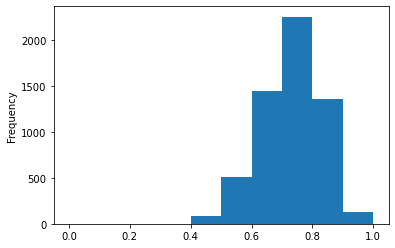

In [12]:
df_input_scale['rating'].plot(kind='hist')

In [13]:
df_zom.head()

,index,url,rest_price_idr,review,lat,long,is_chain,rating,new_code_res_type,rank_res_type,new_code_fac,rank_fac
0,0,https://www.zomato.com/jakarta/wakacao-1-kelap...,150,56.0,-6.167531,106.901752,0,3.8,4,0,4,0
1,1,https://www.zomato.com/jakarta/the-coffee-bean...,110,61.0,-6.157341,106.907888,1,3.0,0,91,0,1353
2,2,https://www.zomato.com/jakarta/angke-kelapa-ga...,450,363.0,-6.152638,106.892576,0,4.5,2,2,0,907
3,3,https://www.zomato.com/jakarta/ikan-nila-pak-u...,100,113.0,-6.163588,106.903689,0,3.9,0,20,0,4
4,4,https://www.zomato.com/jakarta/hong-kong-sheng...,220,257.0,-6.157255,106.908430,1,4.1,0,275,0,83


# Preprocessing 

In [14]:
# split train and test 

X_train, X_test, y_train, y_test = train_test_split(df_input_scale.drop(target_column, axis=1), df_input_scale[target_column], test_size=0.2, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(df.drop(['url','index','rating','lat','long','review'],axis=1), df['rating'], test_size=0.3, random_state=42)

In [15]:
X_train.head()

,rest_price_idr,is_chain,rank_res_type,rank_fac
3071,0.51778,1.0,0.170135,0.015124
2860,0.51778,0.0,0.216646,0.265578
4694,0.51778,0.0,0.031824,0.011494
5696,0.51778,1.0,0.008568,0.002420
3107,0.51778,0.0,0.004896,0.022989


In [16]:
X_train.shape

(4642, 4)

 MAE 0.07957388022102542 
 MSE 0.01021689012580894 
 R2 0.705197117739755 


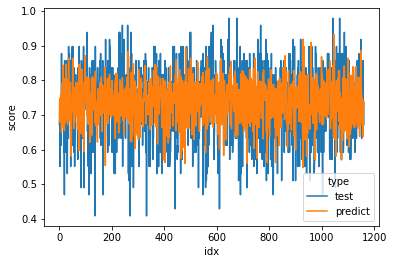

In [17]:
# random forest 

regr = RandomForestRegressor(random_state=0)
model_regr, y_pred_test_regr, y_pred_train_regr, result_rf   = model_perform(X_train, y_train, X_test, y_test, regr, name='rf', verbose =1 )

show_error_pattern(y_pred=y_pred_test_regr, y_test=y_test)

# show_error_pattern(y_pred=y_pred_train_regr, y_test=y_train)

 MAE 0.07571915290206861 
 MSE 0.00941134317441536 
 R2 0.5875230776398939 


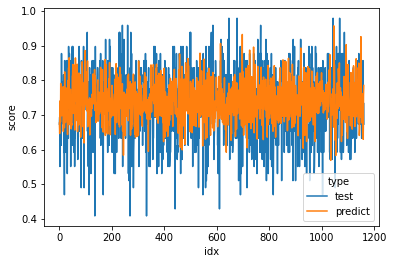

In [18]:
# XGBoost 

xgbr = XGBRegressor(random_state=0)
model_xgbr, y_pred_test_xgbr, y_pred_train_xgbr, result_xgb  = model_perform(X_train, y_train, X_test, y_test, xgbr, name = 'xgb', verbose = 1)

show_error_pattern(y_pred=y_pred_test_xgbr, y_test=y_test)

 MAE 0.0783181342834367 
 MSE 0.009529474595746507 
 R2 0.04112990751054513 


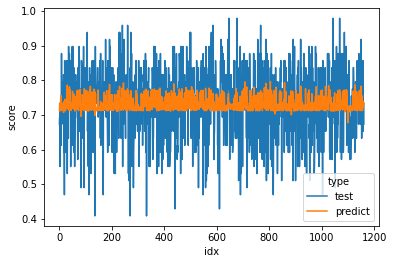

In [19]:
# SVR 
svr = SVR(kernel='poly')

model_svr, y_pred_test_svr, y_pred_train_svr, result_svr  = model_perform(X_train, y_train, X_test, y_test, svr, name = 'svr',verbose = 1)

show_error_pattern(y_pred=y_pred_test_svr, y_test=y_test)

 MAE 0.1352550561745217 
 MSE 0.032014146768776564 
 R2 0.6804042643063573 


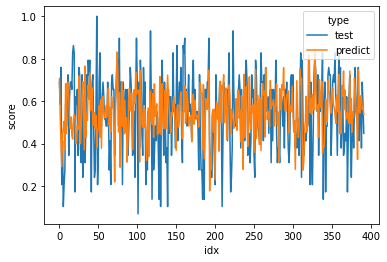

In [20]:
# chain restaurant zomato
df_zom_chain = df_zom[df_zom['is_chain']==1]

drop_column = ['url','index','rating','lat','long','review','new_code_res_type','new_code_fac']

target_column = 'rating'


# scaled the values 
features_columns = df_zom_chain.drop(drop_column,axis=1).columns
features_columns = list(features_columns) + [target_column]
scaler = MinMaxScaler()
df_input_scale = pd.DataFrame(scaler.fit_transform(df_zom_chain[features_columns]), columns = features_columns)

X_train, X_test, y_train, y_test = train_test_split(df_input_scale.drop(target_column, axis=1), df_input_scale[target_column], test_size=0.2, random_state=42)

regr = RandomForestRegressor(random_state=0)
model_regr, y_pred_test_regr, y_pred_train_regr, result_rf  = model_perform(X_train, y_train, X_test, y_test, regr, name='rf', verbose =1 )

show_error_pattern(y_pred=y_pred_test_regr, y_test=y_test)

 MAE 0.07966177924235918 
 MSE 0.010161671858566935 
 R2 0.7040478369278351 


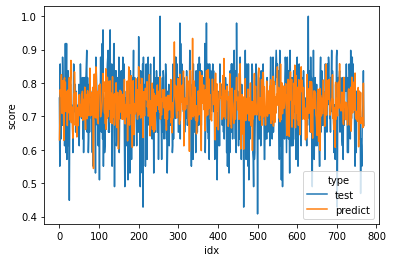

In [21]:
# non chain restaurant zomato
df_zom_non_chain = df_zom[df_zom['is_chain']==0]

drop_column = ['url','index','rating','lat','long','review','new_code_res_type','new_code_fac']

target_column = 'rating'


# scaled the values 
features_columns = df_zom_non_chain.drop(drop_column,axis=1).columns
features_columns = list(features_columns) + [target_column]
scaler = MinMaxScaler()
df_input_scale = pd.DataFrame(scaler.fit_transform(df_zom_non_chain[features_columns]), columns = features_columns)

X_train, X_test, y_train, y_test = train_test_split(df_input_scale.drop(target_column, axis=1), df_input_scale[target_column], test_size=0.2, random_state=42)

regr = RandomForestRegressor(random_state=0)
model_regr, y_pred_test_regr, y_pred_train_regr, result_rf  = model_perform(X_train, y_train, X_test, y_test, regr, name='rf', verbose =1 )

show_error_pattern(y_pred=y_pred_test_regr, y_test=y_test)

# Zomato + POI 

In [22]:
df_zom_poi = pd.read_csv('data/3_clean_zomato_gof_1000.csv')
df_zom_poi['rest_price_idr'] = df_zom_poi['rest_price_idr'] / 1000
df_zom_poi['rest_price_idr'] = df_zom_poi['rest_price_idr'].astype(int)

drop_column = ['url','index','rating','lat','long','review','new_code_res_type','new_code_fac','geohash']
target_column = 'rating'

# scaled the values 
features_columns = df_zom_poi.drop(drop_column,axis=1).columns
features_columns = list(features_columns) + [target_column]
scaler = MinMaxScaler()
df_input_scale = pd.DataFrame(scaler.fit_transform(df_zom_poi[features_columns]), columns = features_columns)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df_input_scale.drop('rating',axis=1), \
    df_input_scale['rating'], test_size=0.2, random_state=42)


 MAE 0.07464912080249844 
 MSE 0.008966405484709073 
 R2 0.8726396579811655 


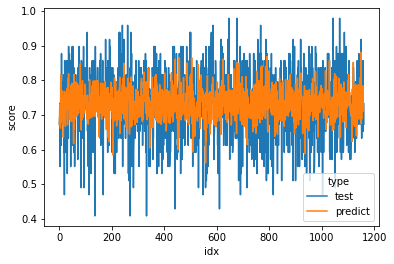

In [24]:
# random forest 

regr = RandomForestRegressor(random_state=0)
model_regr, y_pred_test_regr, y_pred_train_regr, result_rf   = model_perform(X_train, y_train, X_test, y_test, regr, name='rf', verbose =1 )

show_error_pattern(y_pred=y_pred_test_regr, y_test=y_test)

 MAE 0.07490788064190493 
 MSE 0.009155585394548194 
 R2 0.8125692533443607 


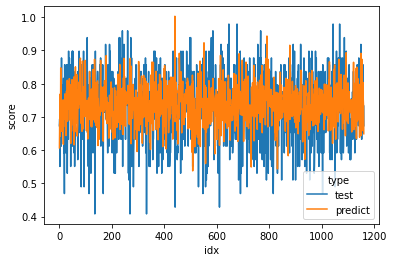

In [25]:
# XGBoost 

xgbr = XGBRegressor(random_state=0)
model_xgbr, y_pred_test_xgbr, y_pred_train_xgbr, result_xgb  = model_perform(X_train, y_train, X_test, y_test, xgbr, name = 'xgb',verbose = 1)

show_error_pattern(y_pred=y_pred_test_xgbr, y_test=y_test)

 MAE 0.07782258978141036 
 MSE 0.00945829499772623 
 R2 0.17590080309770628 


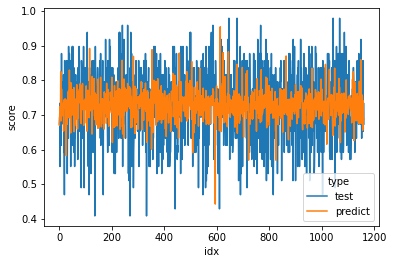

In [26]:
# SVR 
svr = SVR(kernel='poly')

model_svr, y_pred_test_svr, y_pred_train_svr, result_svr  = model_perform(X_train, y_train, X_test, y_test, svr, name='svr' ,verbose = 1)

show_error_pattern(y_pred=y_pred_test_svr, y_test=y_test)

In [27]:
# feature importance 
df_feat = pd.DataFrame({'score':model_xgbr.feature_importances_,'columns':X_train.columns})
df_feat.sort_values('score',ascending=False)


,score,columns
19,0.083660,d_1000_train_station
0,0.080879,rest_price_idr
12,0.055994,d_1000_meal_takeaway
18,0.055962,d_1000_supermarket
13,0.054207,d_1000_mosque
9,0.053774,d_1000_gas_station
3,0.053339,rank_fac
15,0.051093,d_1000_restaurant
11,0.049081,d_1000_lodging
16,0.048475,d_1000_school
